In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
'''
constants
'''
kp = 1.0              # kp index
gs = 2.0              # shileding constant
RE = 6378.1370        # equatorial radius of Earth [km]
pcolor = 'gnuplot2'

In [3]:
def convection_field(kp):
    
    E0 = 0.045/((1-(0.159*kp) + (0.0093*kp**2))**3*(RE**2))
    return E0

def vs_potential_polar(r_geo,theta,gs):
    
    # uniform convection electric field strength in equatorial plane
    E0 = convection_field(kp)

    # vs-potential
    U = -E0*(r_geo**gs)*math.sin(theta)
    return U

def rdist(l, mlt):
    ang = mlt*15*(np.pi/180)
    r = l*RE#*np.sin(ang)**2
    return r

def draw_earth(ax):
    '''
    A handy function for drawing the Earth in a set of Polar Axes
    
    Soruce: IMEF (M. Argall)
    '''
    ax.fill_between(np.linspace(-np.pi / 2, np.pi / 2, 30), 0, np.ones(30), color='k')
    ax.fill_between(np.linspace(np.pi / 2, 3 * np.pi / 2, 30), np.ones(30), color='w')
    
    ax.plot(np.linspace(np.pi / 2, 3 * np.pi / 2, 30), np.ones(30), color='k')

In [4]:
'''
Calculating potential grid - Polar (r, theta)

'''
'''
rmax = 10000.0 # max radial distance in gridspace
tmax = 2.0 * np.pi # max angle
dr = 300 # incrementation
'''

lmax = 10 
mltmax = 24

# convert to radial geo and theta

rmax = lmax*RE                  # rdist(lmax, mltmax)
tmax = mltmax*15*(np.pi/180)    # max angle
dr = 300                        # incrementation


# uniform convection electric field strength in equatorial plane
E0 = convection_field(kp)

# coordinates

rn = np.linspace(0, rmax, dr)
tn = np.linspace(0.0, tmax, dr)

r, theta = np.meshgrid(rn, tn)

ln = np.linspace(0, lmax, dr)
mn = np.linspace(0.0, mltmax, dr)

# create meshgrid
l, mlt = np.meshgrid(ln, mn)

# array 
emap_new = np.zeros(r.shape) # E field
umap_new = np.zeros(r.shape) # Potential


# calculate potential and assign values to array
for i in range(0,dr):
    for j in range(0,dr):
        
        r_geo = r[i,j]
        theta1 = theta[i,j]
        
        
        E1 = E0*gs*(r_geo**(gs-1))*math.sin(theta1)
        E2 = E0*(r_geo**(gs-1))*math.cos(theta1)
        
        emap_new[i,j] = np.sqrt(E1**2+E2**2)
        umap_new[i,j] = vs_potential_polar(r_geo,theta1,gs)

bad = np.where(r < RE)
emap_new[bad] = np.nan

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_25898/60604564.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  eplot = ax1.pcolormesh(theta,r,emap_new, cmap=pcolor, shading='nearest')


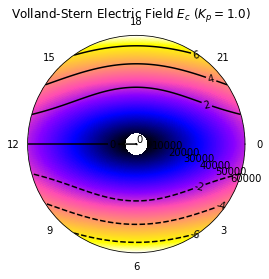

In [5]:
# Plot the electric field
# Scale makes the arrows smaller/larger. Bigger number = smaller arrows.
# May need to be changed when more data points are present

fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, subplot_kw=dict(projection='polar'))

ax1 = axes[0, 0]

# E-Field
eplot = ax1.pcolormesh(theta,r,emap_new, cmap=pcolor, shading='nearest')
ax1.set_thetagrids(np.linspace(0, 360, 9), labels=['0', '3', '6', '9', '12', '15', '18', '21', ' '])

# contour potential
uplot = ax1.contour(theta,r,umap_new,8, colors='black') 
ax1.clabel(uplot, uplot.levels, fmt = '%1.0f')
draw_earth(ax1)

# set clockwise labels
ax1.set_theta_direction(-1)

# place 0 at top
# ax1.set_theta_offset(np.pi/2.0)    

fig.suptitle("Volland-Stern Electric Field $E_c$ ($K_p =$" + str(kp) + ")")
#fig.colorbar(fig1, ax=ax1)

plt.show()

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_25898/2109635346.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig1 = ax1.pcolormesh(theta,r,emap_new, cmap=pcolor, shading='nearest')


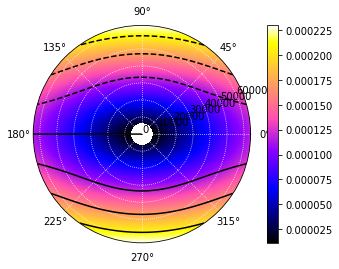

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False, subplot_kw=dict(projection='polar'))

ax1 = axes[0,0]

fig1 = ax1.pcolormesh(theta,r,emap_new, cmap=pcolor, shading='nearest')
fig.colorbar(fig1, ax=ax1)

fig2 = ax1.contour(theta,r,umap_new,8, colors='black') 

ax1.grid(color='w', linestyle=':', linewidth=0.75)

#fig.suptitle("Volland-Stern Electric Field $E_c$ ($K_p =$" + str(kp) + ")")

#draw_earth(ax1)

plt.show()

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_25898/1936502778.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(theta,r,emap_new, cmap=pcolor, shading='nearest')


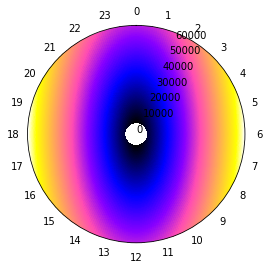

In [7]:
ax = plt.subplot(111, polar=True)
equals = np.linspace(0, 360, 24, endpoint=False) #np.arange(24)
ones = np.ones(24)
ax.pcolormesh(theta,r,emap_new, cmap=pcolor, shading='nearest')     


# Set the circumference labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))      

# Make the labels go clockwise
ax.set_theta_direction(-1)       

# Place 0 at the top
ax.set_theta_offset(np.pi/2.0)       

plt.show()